<center><h1><b>Quora Insincere Questions Classification Using Neural Networks and Deep Learning Models</b></h1></center>


Outline:
1. Dowload data from Kaggle to google Colab

2. Prepare the data for Modeling using the TF-IDF Technique

3. Train a deep learning model using `PyTorch` package

## Download Data from Kaggle

In [123]:
!ls

data  kaggle.json  sample_data


In [124]:
!pwd

/content


In [125]:
import os

In [126]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [127]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

  0% 0.00/54.9M [00:00<?, ?B/s]
100% 54.9M/54.9M [00:00<00:00, 833MB/s]
  0% 0.00/15.8M [00:00<?, ?B/s]
100% 15.8M/15.8M [00:00<00:00, 984MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 622MB/s]


In [128]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [129]:
import pandas as pd

In [130]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sample_fname)

In [131]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [132]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [133]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [134]:
raw_df.sample(10)

,qid,question_text,target
77786,0f3a3b6f1b3b8e0f0a84,What would be the time complexity of this prog...,0
412138,50c25329d584f71329f4,How do I unlink my YouTube account that I long...,0
657860,80dac54727c0a0de1708,It's goddamn scary that innocent Middle Easter...,1
1221030,ef4f686d75ed45b59ea8,What are the most successful Churches in India?,0
535946,68fa0c0b0700164a8102,What are some websites where people post paid ...,0
425328,535de1726059e5e41acf,Is it possible for a PCB student to get select...,0
136205,1aa96e7b5ffbd401ed49,How can we make a good day?,0
81951,100c33ceeb966534f25f,How do I ask the president for a pardon?,0
528320,677089784715ef8a49da,What are the characteristics of the five anima...,0
420207,5259ebe2f0544078e920,What should be the name for our exhibition on ...,0


## Data Exploration

In [135]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(SAMPLE_SIZE)

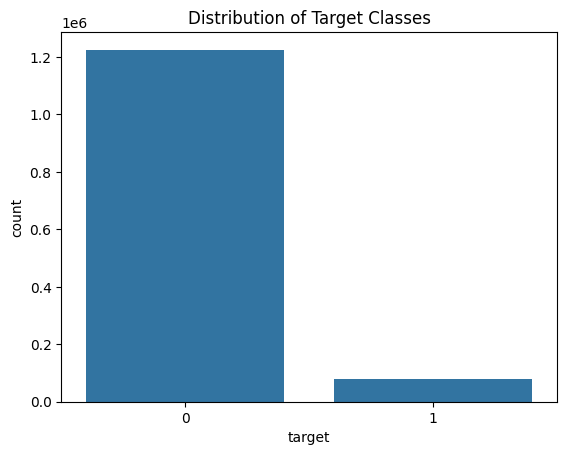

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=raw_df)
plt.title('Distribution of Target Classes')
plt.show()

In [137]:
# Add character count column if not already added
raw_df['char_count'] = raw_df['question_text'].apply(len)

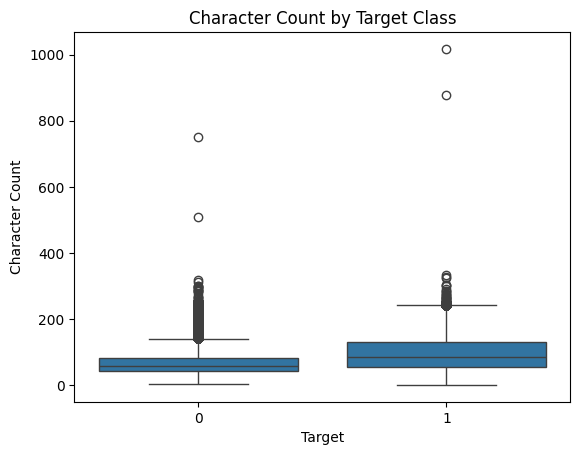

In [138]:
# Box plot of character count by target class
sns.boxplot(x='target', y='char_count', data=raw_df)
plt.title('Character Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Character Count')
plt.show()


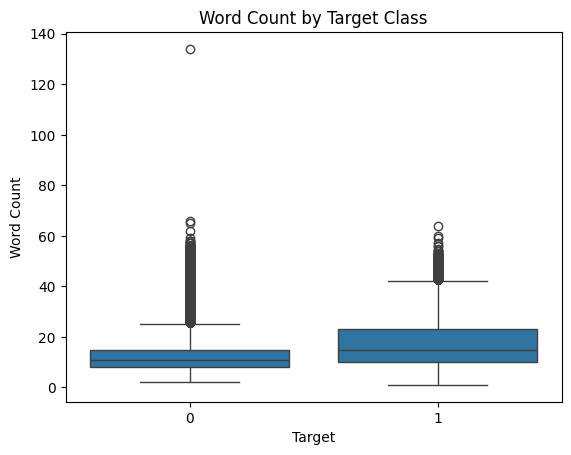

In [139]:
# Add word count column
raw_df['word_count'] = raw_df['question_text'].apply(lambda x: len(x.split()))

# Box plot of word count
sns.boxplot(x='target', y='word_count', data=raw_df)
plt.title('Word Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.show()


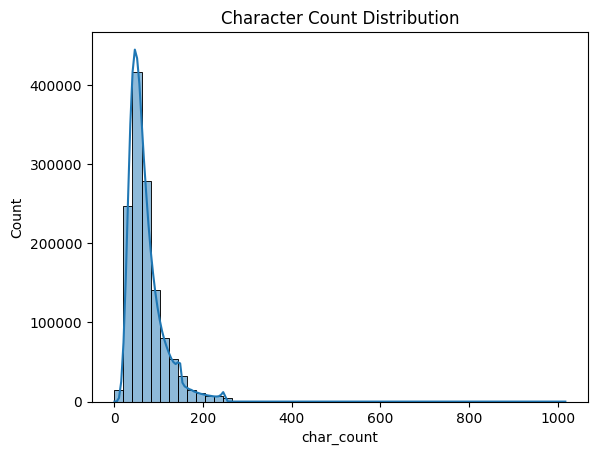

In [140]:
raw_df.char_count = raw_df['question_text'].apply(len)
raw_df.word_count = raw_df['question_text'].apply(lambda x: len(x.split()))

# Plot distributions
sns.histplot(raw_df.char_count, bins=50, kde=True)
plt.title('Character Count Distribution')
plt.show()


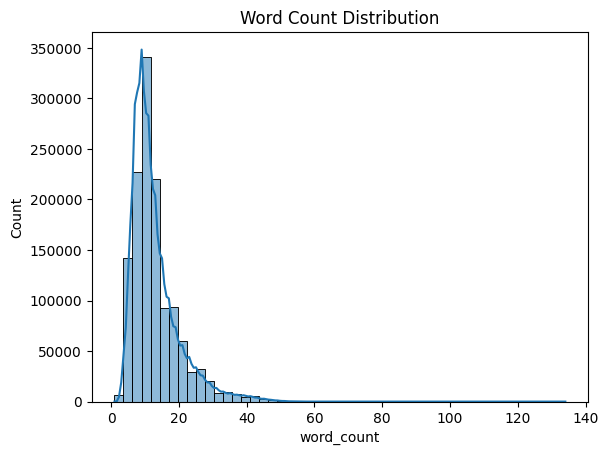

In [141]:
sns.histplot(raw_df.word_count, bins=50, kde=True)
plt.title('Word Count Distribution')
plt.show()

In [142]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).lower().split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

top_words = get_top_n_words(sample_df['question_text'], n=20)
print(top_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('get', 4807), ('best', 4771), ('would', 4746), ('people', 3701), ('like', 3401), ('good', 2716), ('one', 2329), ('make', 2122), ('many', 1902), ('think', 1902), ('much', 1696), ('someone', 1621), ('use', 1582), ('way', 1480), ('want', 1432), ('know', 1410), ('become', 1341), ('take', 1334), ('find', 1315), ('without', 1286)]


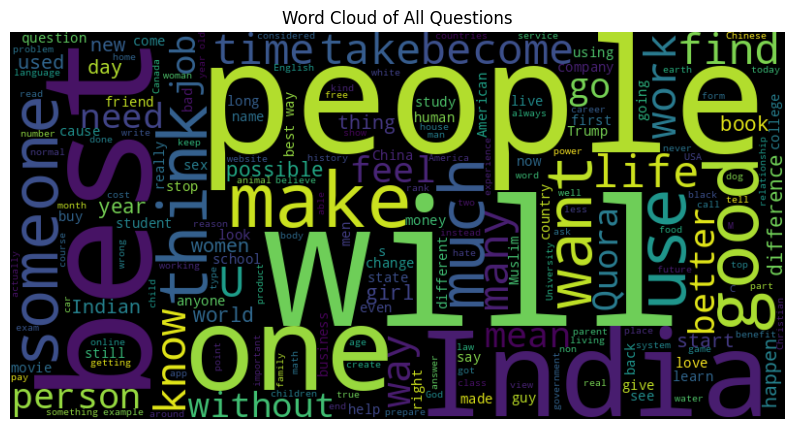

In [143]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(sample_df['question_text']))
plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Questions")
plt.show()


In [144]:
raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)
raw_df

<ipython-input-144-d02c7e5e2bf1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)


,qid,question_text,target,char_count,word_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15
...,...,...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0,93,17
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0,91,19
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0,25,4
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0,71,13


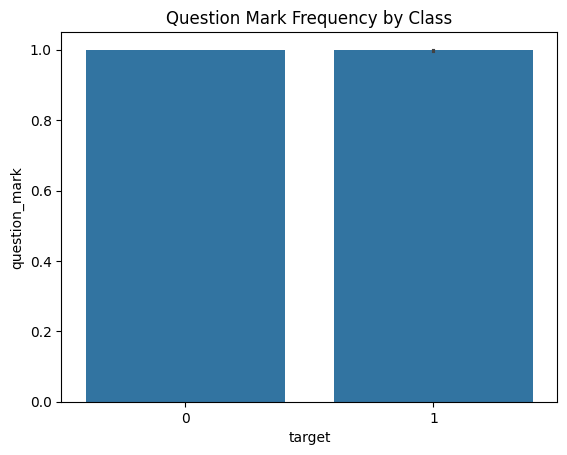

In [145]:
# Presence of question mark
raw_df['question_mark'] = raw_df['question_text'].apply(lambda x: '?' in x)

sns.barplot(x='target', y='question_mark', data=raw_df)
plt.title('Question Mark Frequency by Class')
plt.show()


In [146]:
sample_df

,qid,question_text,target
597561,750bd423fd74ae5d871a,What is Indian Health Services?,0
662594,81c870ca8a594ccc93ab,What is the best age to take your kids to Disn...,0
366083,47c127231dde121dee2d,What happened to the Hillary4Prison movement?,0
39325,07b2903078c7333f51ce,What are some of the adult animated movies wor...,0
654674,803d182842925114824b,Have Americans ever wondered that the cheap pr...,1
...,...,...,...
351922,44fa53edf30c8c603d0f,What are some examples of mass culture?,0
305784,3be4f61c80213add3bf9,"In Texas, how much time does a person do on a ...",0
214609,29f9c60cbb67a187678f,Is breast a secondary sex organ?,0
358621,464b57dccf2cf8d99d9c,How do I get rid of black ants in my house?,0


In [147]:
sample_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93684
1,0.06316


## Prepare the Data for Training
- Convert text to TF-IDF Vectors

- Convert Vectors to PyyTorch tensors

- Create PyTorch Data Loaders

### Convert text to TF-IDF

In [148]:
import nltk

In [149]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [150]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [151]:
stemmer = SnowballStemmer(language='english')

In [152]:
stemmer.stem('going')

'go'

In [153]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text) ]

In [154]:
tokenize('This is a set of butterfries unexpectedily!')

['this', 'is', 'a', 'set', 'of', 'butterfri', 'unexpectedili', '!']

In [155]:
word_tokenize('This is something very new () in the field of data analysis.')

['This',
 'is',
 'something',
 'very',
 'new',
 '(',
 ')',
 'in',
 'the',
 'field',
 'of',
 'data',
 'analysis',
 '.']

In [156]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
english_stopwords = stopwords.words('english')

In [158]:
','.join(english_stopwords)

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [160]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)

In [161]:
sample_df.question_text

,question_text
597561,What is Indian Health Services?
662594,What is the best age to take your kids to Disn...
366083,What happened to the Hillary4Prison movement?
39325,What are some of the adult animated movies wor...
654674,Have Americans ever wondered that the cheap pr...
...,...
351922,What are some examples of mass culture?
305784,"In Texas, how much time does a person do on a ..."
214609,Is breast a secondary sex organ?
358621,How do I get rid of black ants in my house?


In [162]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 26.5 s, sys: 88.8 ms, total: 26.6 s
Wall time: 26.8 s


TfidfVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7906241079c0>)

In [163]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '30', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``',
       'abl', 'abroad', 'abus', 'accept', 'access', 'accomplish',
       'accord', 'account', 'achiev', 'acid', 'act', 'action', 'activ',
       'actor', 'actual', 'ad', 'add', 'address', 'admiss', 'adult',
       'advanc', 'advantag', 'advic', 'affect', 'africa', 'african',
       'age', 'ago', 'air', 'allow', 'alreadi', 'also', 'alway', 'amazon',
       'america', 'american', 'among', 'amount', 'analysi', 'ancient',
       'android', 'ani', 'anim', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'arm', 'armi', 'around', 'art', 'asian', 'ask',
       'associ', 'atheist', 'attack'], dtype=object)

## Transform the questionsin to Vectors

In [164]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 26.6 s, sys: 96.7 ms, total: 26.7 s
Wall time: 26.9 s


In [165]:
inputs.shape

(100000, 1000)

In [166]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 549882 stored elements and shape (100000, 1000)>

In [167]:
inputs[0].toarray()[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.09400635, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [168]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 39s, sys: 286 ms, total: 1min 40s
Wall time: 1min 40s


In [169]:
test_inputs.shape

(375806, 1000)

## Split the Training and Validation Sets

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
targets = sample_df.target

In [172]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3)

In [173]:
train_inputs.shape

(70000, 1000)

In [174]:
val_inputs.shape

(30000, 1000)

In [175]:
train_targets

,target
922717,0
58763,0
463591,0
20579,0
566677,0
...,...
708754,0
91445,0
617474,0
336919,0


In [176]:
val_targets

,target
480091,0
844789,0
708548,0
393975,0
878435,0
...,...
79138,0
112486,0
240390,0
1294111,0


## Convert to PyTorch Tensors

In [177]:
import torch

In [178]:
#convert from a sparse matrix to numpy array using the command .toarray() and converting to float
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [179]:
train_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [180]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [181]:
val_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [182]:
val_input_tensors.shape

torch.Size([30000, 1000])

In [183]:
# convert from pandas series to numpy array using the command .values
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [184]:
test_inputs_tensors = torch.tensor(test_inputs.toarray()).float()

## Create PyTorch Data Loaders

In [185]:
from torch.utils.data import TensorDataset, DataLoader

In [186]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(train_input_tensors)

In [187]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [188]:
BATCH_SIZE = 128

In [189]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)

In [190]:
for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print('batch_inputs.shape', batch_inputs.shape)
  print('batch_targets.shape', batch_targets.shape)
  break

batch_inputs.shape torch.Size([128, 1000])
batch_targets.shape torch.Size([128])


In [191]:
len(train_dl)

547

In [192]:
# about 547 batches in the data loader

## Train Deep Learning Model

In [193]:
import torch.nn as nn
import torch.nn.functional as F

In [194]:
from sklearn.metrics import accuracy_score, f1_score

In [195]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    pass
  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out


In [196]:
model = QuoraNet()

In [197]:
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets.shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)

  # convert outputs to probabilities
  probs = torch.sigmoid(bo[:,0])
  print('probs', probs[:10])

  #convert probs to predictions
  preds = (probs > 0.5).int()
  print('preds', preds[:10])
  print('batch_targets', bt[:10])

   # check the metrics
  print('Accuracy score', accuracy_score(bt, preds))
  print('F1 score', f1_score(bt, preds))

  # Loss
  print('Loss', F.binary_cross_entropy(preds.float(), bt))

  break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.4928, 0.4934, 0.4935, 0.4931, 0.4926, 0.4934, 0.4928, 0.4930, 0.4930,
        0.4928], grad_fn=<SliceBackward0>)
preds tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
batch_targets tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Accuracy score 0.9609375
F1 score 0.0
Loss tensor(3.9062)


In [198]:
bi[:10]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [199]:
bi.shape

torch.Size([128, 1000])

In [200]:
bt[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [201]:
bt.shape

torch.Size([128])

In [202]:
bo[:10]

tensor([[-0.0288],
        [-0.0262],
        [-0.0261],
        [-0.0275],
        [-0.0297],
        [-0.0263],
        [-0.0290],
        [-0.0280],
        [-0.0278],
        [-0.0286]], grad_fn=<SliceBackward0>)

In [203]:
bo.shape

torch.Size([128, 1])

In [204]:
# Evaluate model performance
def evaluate(model, dl):
  losses, accs, f1s = [], [], []

  # loop over batches
  for batch in dl:

    # Get inputs and targets
    inputs, targets = batch

    # Get outputs from the model
    outputs = model(inputs)

    # convert to probabilities
    probs = torch.sigmoid(outputs[:,0])

    # compute loss
    loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

    # compute preds
    preds = (probs > 0.5).int()

    # compute accuracy and F1 scores
    acc = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds)

    losses.append(loss)
    accs.append(acc)
    f1s.append(f1)

  return (torch.mean(torch.tensor(losses)).item(),
  torch.mean(torch.tensor(accs)).item(),
  torch.mean(torch.tensor(f1s)).item())


In [205]:
evaluate(model, train_dl)

(13.616724967956543, 0.9362471699714661, 0.0)

In [206]:
evaluate(model, val_dl)

(13.615718841552734, 0.9382314085960388, 0.0)

In [207]:
from operator import le
# Train the model batch by batch
def fit(epochs, lr, model, train_dl, val_dl):
  history = []
  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)

  for epoch in range(epochs):
    # Training phase of the model
    for batch in train_dl:

      # Get inputs and targets
      inputs, targets = batch

      # Get model outputs
      outputs = model(inputs)

      # Get probabilities
      probs = torch.sigmoid(outputs[:,0])

      # Compute loss
      loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

      # Perform optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Evaluation phase of the model
    loss, acc, f1 = evaluate(model, val_dl)
    print('Epoch: {}, Loss {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}'.format(
        epoch+1, loss, acc, f1))
    history.append([loss, acc, f1])
  return history






In [208]:
fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 3.0641, Accuracy: 0.9463, F1 Score: 0.4015
Epoch: 2, Loss 3.0110, Accuracy: 0.9478, F1 Score: 0.4366
Epoch: 3, Loss 3.1685, Accuracy: 0.9458, F1 Score: 0.4434
Epoch: 4, Loss 4.0889, Accuracy: 0.9457, F1 Score: 0.4156
Epoch: 5, Loss 4.7602, Accuracy: 0.9390, F1 Score: 0.4283


[[3.0640785694122314, 0.9462987780570984, 0.4015236794948578],
 [3.011009693145752, 0.9478058218955994, 0.4365714490413666],
 [3.1684515476226807, 0.9458001255989075, 0.4434015154838562],
 [4.088879585266113, 0.9456892013549805, 0.4155552387237549],
 [4.760166645050049, 0.9389517307281494, 0.4283253848552704]]

In [209]:
model = QuoraNet()

In [210]:
history = []

In [211]:
history.append(evaluate(model, val_dl))

In [212]:
history

[(14.444990158081055, 0.06176861748099327, 0.1155412569642067)]

In [213]:
history+=fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 3.1106, Accuracy: 0.9450, F1 Score: 0.3005
Epoch: 2, Loss 3.0267, Accuracy: 0.9474, F1 Score: 0.3744
Epoch: 3, Loss 3.0974, Accuracy: 0.9466, F1 Score: 0.4189
Epoch: 4, Loss 3.7647, Accuracy: 0.9454, F1 Score: 0.4103
Epoch: 5, Loss 4.9271, Accuracy: 0.9415, F1 Score: 0.4055


In [214]:
history+=fit(10, 0.0001, model, train_dl, val_dl)

Epoch: 1, Loss 5.9937, Accuracy: 0.9418, F1 Score: 0.4313
Epoch: 2, Loss 6.6325, Accuracy: 0.9434, F1 Score: 0.4150
Epoch: 3, Loss 6.8645, Accuracy: 0.9419, F1 Score: 0.4285
Epoch: 4, Loss 7.3079, Accuracy: 0.9427, F1 Score: 0.4225
Epoch: 5, Loss 7.4810, Accuracy: 0.9414, F1 Score: 0.4265
Epoch: 6, Loss 7.7942, Accuracy: 0.9426, F1 Score: 0.4300
Epoch: 7, Loss 8.0242, Accuracy: 0.9428, F1 Score: 0.4209
Epoch: 8, Loss 8.1021, Accuracy: 0.9419, F1 Score: 0.4197
Epoch: 9, Loss 8.2860, Accuracy: 0.9425, F1 Score: 0.4240
Epoch: 10, Loss 8.4334, Accuracy: 0.9428, F1 Score: 0.4205


In [215]:
history

[(14.444990158081055, 0.06176861748099327, 0.1155412569642067),
 [3.1106395721435547, 0.9449578523635864, 0.3005393147468567],
 [3.0267155170440674, 0.9473847150802612, 0.37441977858543396],
 [3.0973546504974365, 0.9466312527656555, 0.4188692569732666],
 [3.7647016048431396, 0.9453900456428528, 0.41032829880714417],
 [4.92711067199707, 0.941533625125885, 0.40549010038375854],
 [5.993741989135742, 0.9418107867240906, 0.4313114881515503],
 [6.632505416870117, 0.9434285759925842, 0.41495001316070557],
 [6.864498615264893, 0.9419437646865845, 0.42849722504615784],
 [7.307896137237549, 0.9426751136779785, 0.4225270450115204],
 [7.480969429016113, 0.9413785934448242, 0.4264964461326599],
 [7.794164657592773, 0.9425642490386963, 0.43001142144203186],
 [8.024234771728516, 0.9428302049636841, 0.4209369421005249],
 [8.102066993713379, 0.9419325590133667, 0.41968631744384766],
 [8.28601360321045, 0.9425309896469116, 0.423994243144989],
 [8.433364868164062, 0.9427969455718994, 0.4204588830471039]]

In [216]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [217]:
import matplotlib.pyplot as plt

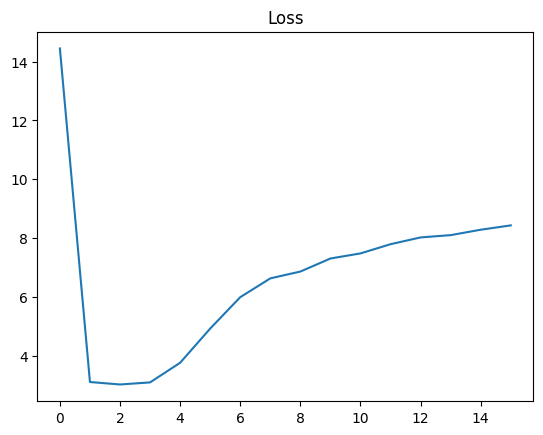

In [218]:
plt.title('Loss')
plt.plot(losses)

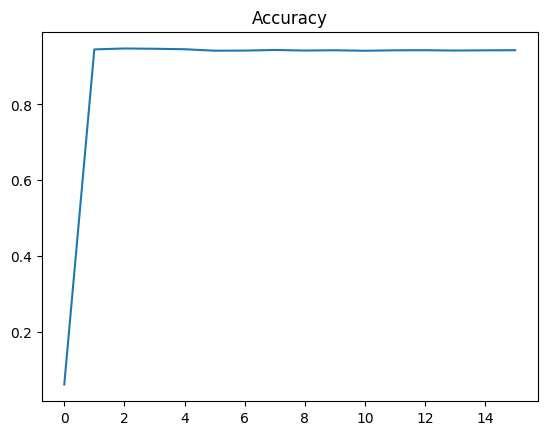

In [219]:
plt.title('Accuracy')
plt.plot(accs)

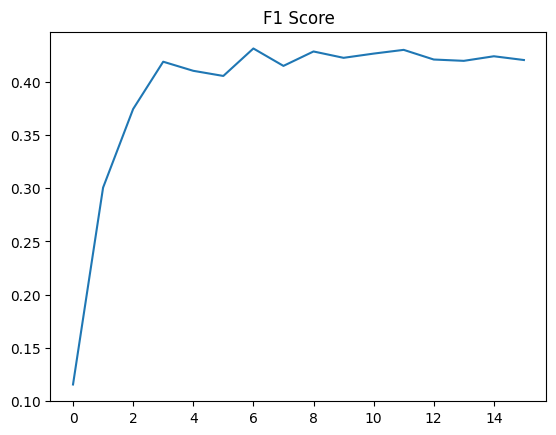

In [220]:
plt.title('F1 Score')
plt.plot(f1s)

## Make Predictions on Example Data

In [221]:
small_df = raw_df.sample(10)

In [222]:
small_df

,qid,question_text,target,char_count,word_count,question_mark
1190860,e96070977d9d266030e0,What are the powers and function of governer?,0,45,8,True
994578,c2e721f296c530bc772d,What are the most popular argumentative essay ...,0,53,8,True
357911,4627258631745f8c18e3,How far can insects like ants see?,0,34,7,True
462959,5aa729c17ffd34de00b1,What is the best time for aerobics dance?,0,41,8,True
1248181,f49bcf0018ab32b78eae,What would happen if Bayinnaung's Taungoo Empi...,0,66,9,True
1035627,caf0366a27b232532305,Has anyone been unfriended on Facebook and oth...,0,143,26,True
1169716,e53945261434c476e28b,Does the value of old gold increase or decreas...,0,58,11,True
590737,73b7c045e5baeca23975,What is the procedure to get a management seat...,0,62,12,True
1024160,c8b2ac8845b37ec964f5,How did you finally give up any guilt or fear ...,0,98,21,True
65554,0cdae362c033940b9725,SAP is known for its high prices - will Gigya ...,0,105,22,True


In [223]:
def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [224]:
# predictions
predict_df(small_df)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [225]:
# actual values
small_df.target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [226]:
small_df.question_text.values

array(['What are the powers and function of governer?',
       'What are the most popular argumentative essay topics?',
       'How far can insects like ants see?',
       'What is the best time for aerobics dance?',
       "What would happen if Bayinnaung's Taungoo Empire attacked Vietnam?",
       'Has anyone been unfriended on Facebook and other social media sites for no reason? If so, did you try to contact the person who unfriended you?',
       'Does the value of old gold increase or decrease with time?',
       'What is the procedure to get a management seat in RUHS Jaipur?',
       'How did you finally give up any guilt or fear or blockage and live the life that you want to live?',
       'SAP is known for its high prices - will Gigya prices stay the same after its acquisition by SAP or go up?'],
      dtype=object)

In [227]:
small_df.question_text[:10]

,question_text
1190860,What are the powers and function of governer?
994578,What are the most popular argumentative essay ...
357911,How far can insects like ants see?
462959,What is the best time for aerobics dance?
1248181,What would happen if Bayinnaung's Taungoo Empi...
1035627,Has anyone been unfriended on Facebook and oth...
1169716,Does the value of old gold increase or decreas...
590737,What is the procedure to get a management seat...
1024160,How did you finally give up any guilt or fear ...
65554,SAP is known for its high prices - will Gigya ...


In [228]:
small_df.iloc[9]["question_text"]


'SAP is known for its high prices - will Gigya prices stay the same after its acquisition by SAP or go up?'

In [229]:
small_df.iloc[4]["question_text"]

"What would happen if Bayinnaung's Taungoo Empire attacked Vietnam?"

In [230]:
small_df.iloc[1]["question_text"]

'What are the most popular argumentative essay topics?'

In [231]:
def predict_text(text):
  df = pd.DataFrame({'question_text': [text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [232]:
predict_text('what is the function of a plasma cell?')

tensor([0], dtype=torch.int32)

In [233]:
predict_text('why cant liberals realize that they are stupid??')

tensor([1], dtype=torch.int32)

In [234]:
predict_text('')

tensor([0], dtype=torch.int32)

In [235]:
predict_text('How does photosynthesis work in plants?')

tensor([0], dtype=torch.int32)

In [236]:
predict_text('Is the moon landing actually fake?')

tensor([0], dtype=torch.int32)

In [237]:
predict_text('When will people stop being so dumb about climate change?')

tensor([0], dtype=torch.int32)

In [238]:
predict_text('Why is the government hiding the truth about aliens?')

tensor([0], dtype=torch.int32)

In [239]:
predict_text('Why do conservatives always ignore facts?')

tensor([1], dtype=torch.int32)

In [240]:
predict_text('Is it possible for flat-earthers to ever use common sense?')

tensor([0], dtype=torch.int32)

In [241]:
predict_text("Why do idiots still believe in climate change?")

tensor([0], dtype=torch.int32)

In [242]:
predict_text('why cant people from west realize that they are selfish??')

tensor([1], dtype=torch.int32)

## Generate Predictions for the Test Set